In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

In [17]:
data = pd.read_csv('./from_db/Unet/Unet- convolutional-layers/params_best_epoch.csv')
metrics = pd.read_csv('./from_db/Unet/Unet- convolutional-layers/train_metrics.csv')

In [23]:
data.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

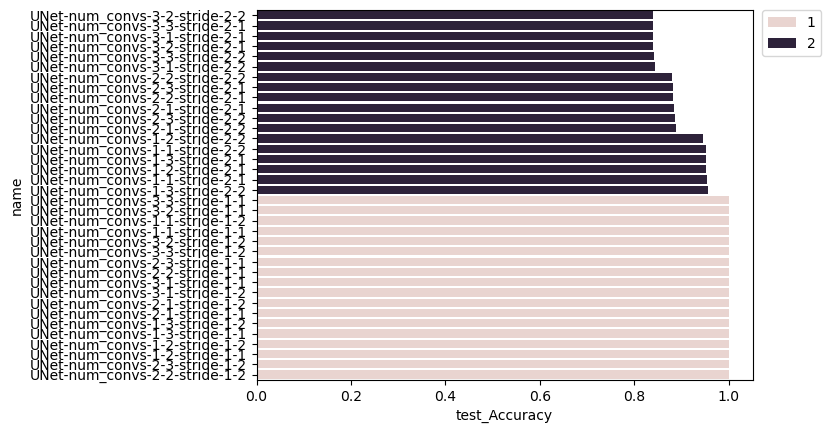

In [37]:
g = sns.barplot(data=data.sort_values(by=['test_Accuracy']), x='test_Accuracy', y='name', hue='arc_stride_1')

g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

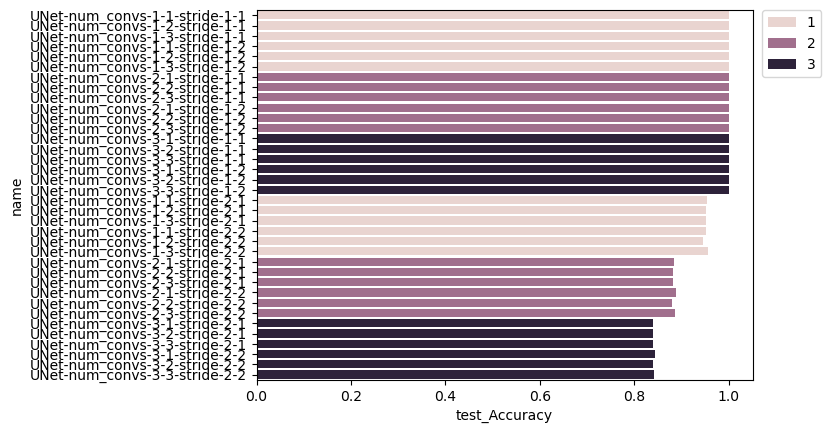

In [31]:
g = sns.barplot(data=data.sort_values(by=['arc_stride_1','arc_num_conv1','arc_stride_2']), x='test_Accuracy', y='name', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

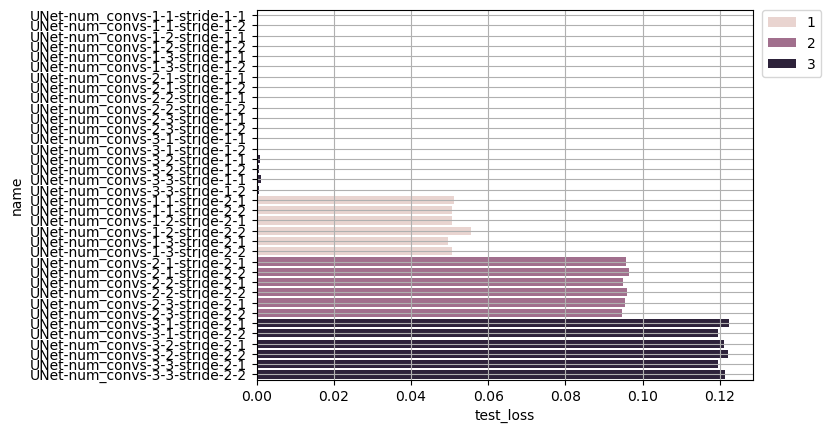

In [36]:
g = sns.barplot(data=data.sort_values(by=['arc_stride_1','arc_num_conv1','arc_num_conv2']), x='test_loss', y='name', hue='arc_num_conv1')
g.grid()
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)

In [40]:
data.columns

Index(['run_uuid', 'name', 'best_epoch', 'arc_filters', 'arc_rank',
       'arc_kernel', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1',
       'arc_num_conv2', 'arc_skip_conn', 'hyp_lr', 'hyp_output_th',
       'hyp_scheduler', 'best_epoch.1', 'train_loss', 'train_Accuracy',
       'train_Accuracy_seq', 'train_F1', 'valid_loss', 'valid_Accuracy',
       'valid_Accuracy_seq', 'valid_F1', 'test_loss', 'test_Accuracy',
       'test_Accuracy_seq', 'test_F1'],
      dtype='object')

In [41]:
cols = ['run_uuid', 'arc_stride_1', 'arc_stride_2', 'arc_num_conv1', 'arc_num_conv2']
metrics = pd.merge(metrics, data[cols], how='left', left_on='run_uuid', right_on='run_uuid')

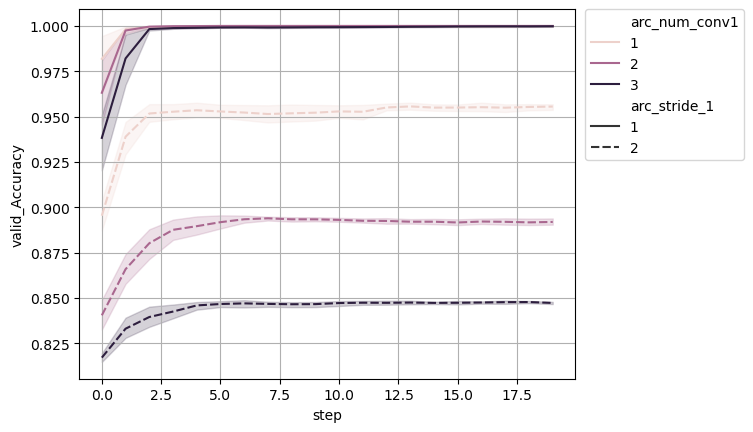

In [51]:
g = sns.lineplot(data=metrics, x='step', y='valid_Accuracy', style='arc_stride_1', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.grid()

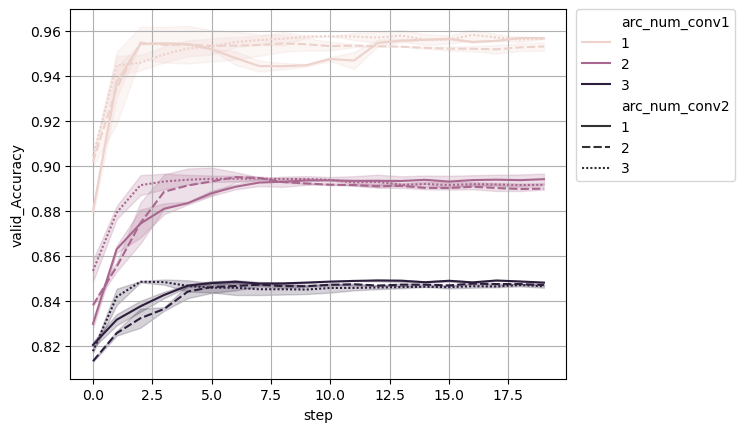

In [56]:
g = sns.lineplot(data=metrics.query('arc_stride_1 == 2'), x='step', y='valid_Accuracy', style='arc_num_conv2', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.grid()

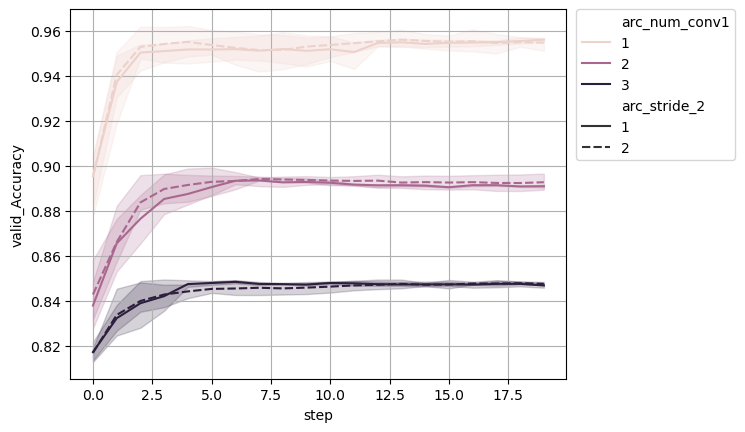

In [57]:
g = sns.lineplot(data=metrics.query('arc_stride_1 == 2'), x='step', y='valid_Accuracy', style='arc_stride_2', hue='arc_num_conv1')
g.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
g.grid()